Projekat 2

Importovanje biblioteka

In [225]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Ucitavanje podataka

In [226]:
data = pd.read_csv('customer_segmentation.csv')
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [227]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [228]:
data = data.rename(
    columns={
                "MntWines": "Wines",
                "MntFruits":"Fruits",
                "MntMeatProducts":"Meat",
                "MntFishProducts":"Fish",
                "MntSweetProducts":"Sweets",
                "MntGoldProds":"Gold",
                "NumDealPurchases":"Deal Purchases",
                "NumWebPurchases":"Web Purchases",
                "NumCatalogPurchases":"Catalog Purchases",
                "NumStorePurchases":"Store Purchases",
                "NumWebVisitsMonth":"Web visits per Month"
            })

In [229]:
#Education i Marital_status su kategoricki atributi, pa cemo ih naknadno enkodirati

print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [230]:
#Provera nedostajucih vrednosti 
data.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
Wines                    0
Fruits                   0
Meat                     0
Fish                     0
Sweets                   0
Gold                     0
NumDealsPurchases        0
Web Purchases            0
Catalog Purchases        0
Store Purchases          0
Web visits per Month     0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [231]:
data['Income'].fillna(data['Income'].median(), inplace = True)
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
Web Purchases           0
Catalog Purchases       0
Store Purchases         0
Web visits per Month    0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [232]:
#Provera duplikata
data.duplicated(subset=None, keep='first')


0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [233]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
data.dtypes

ID                               int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
Wines                            int64
Fruits                           int64
Meat                             int64
Fish                             int64
Sweets                           int64
Gold                             int64
NumDealsPurchases                int64
Web Purchases                    int64
Catalog Purchases                int64
Store Purchases                  int64
Web visits per Month             int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

In [234]:
max(data['Dt_Customer'])


Timestamp('2014-06-29 00:00:00')

In [235]:
min(data['Dt_Customer'])

Timestamp('2012-07-30 00:00:00')

In [236]:
# Zapamti kolonu 'Dt_Customer'
dt_customer_column = data['Dt_Customer']

# Izbačaj kolonu 'Dt_Customer' iz skupa kolona u data
data.drop(columns=['Dt_Customer'], inplace=True)

# Dodaj kolonu 'Dt_Customer' iza kolone 'ID'
data.insert(1, 'Dt_Customer', dt_customer_column)


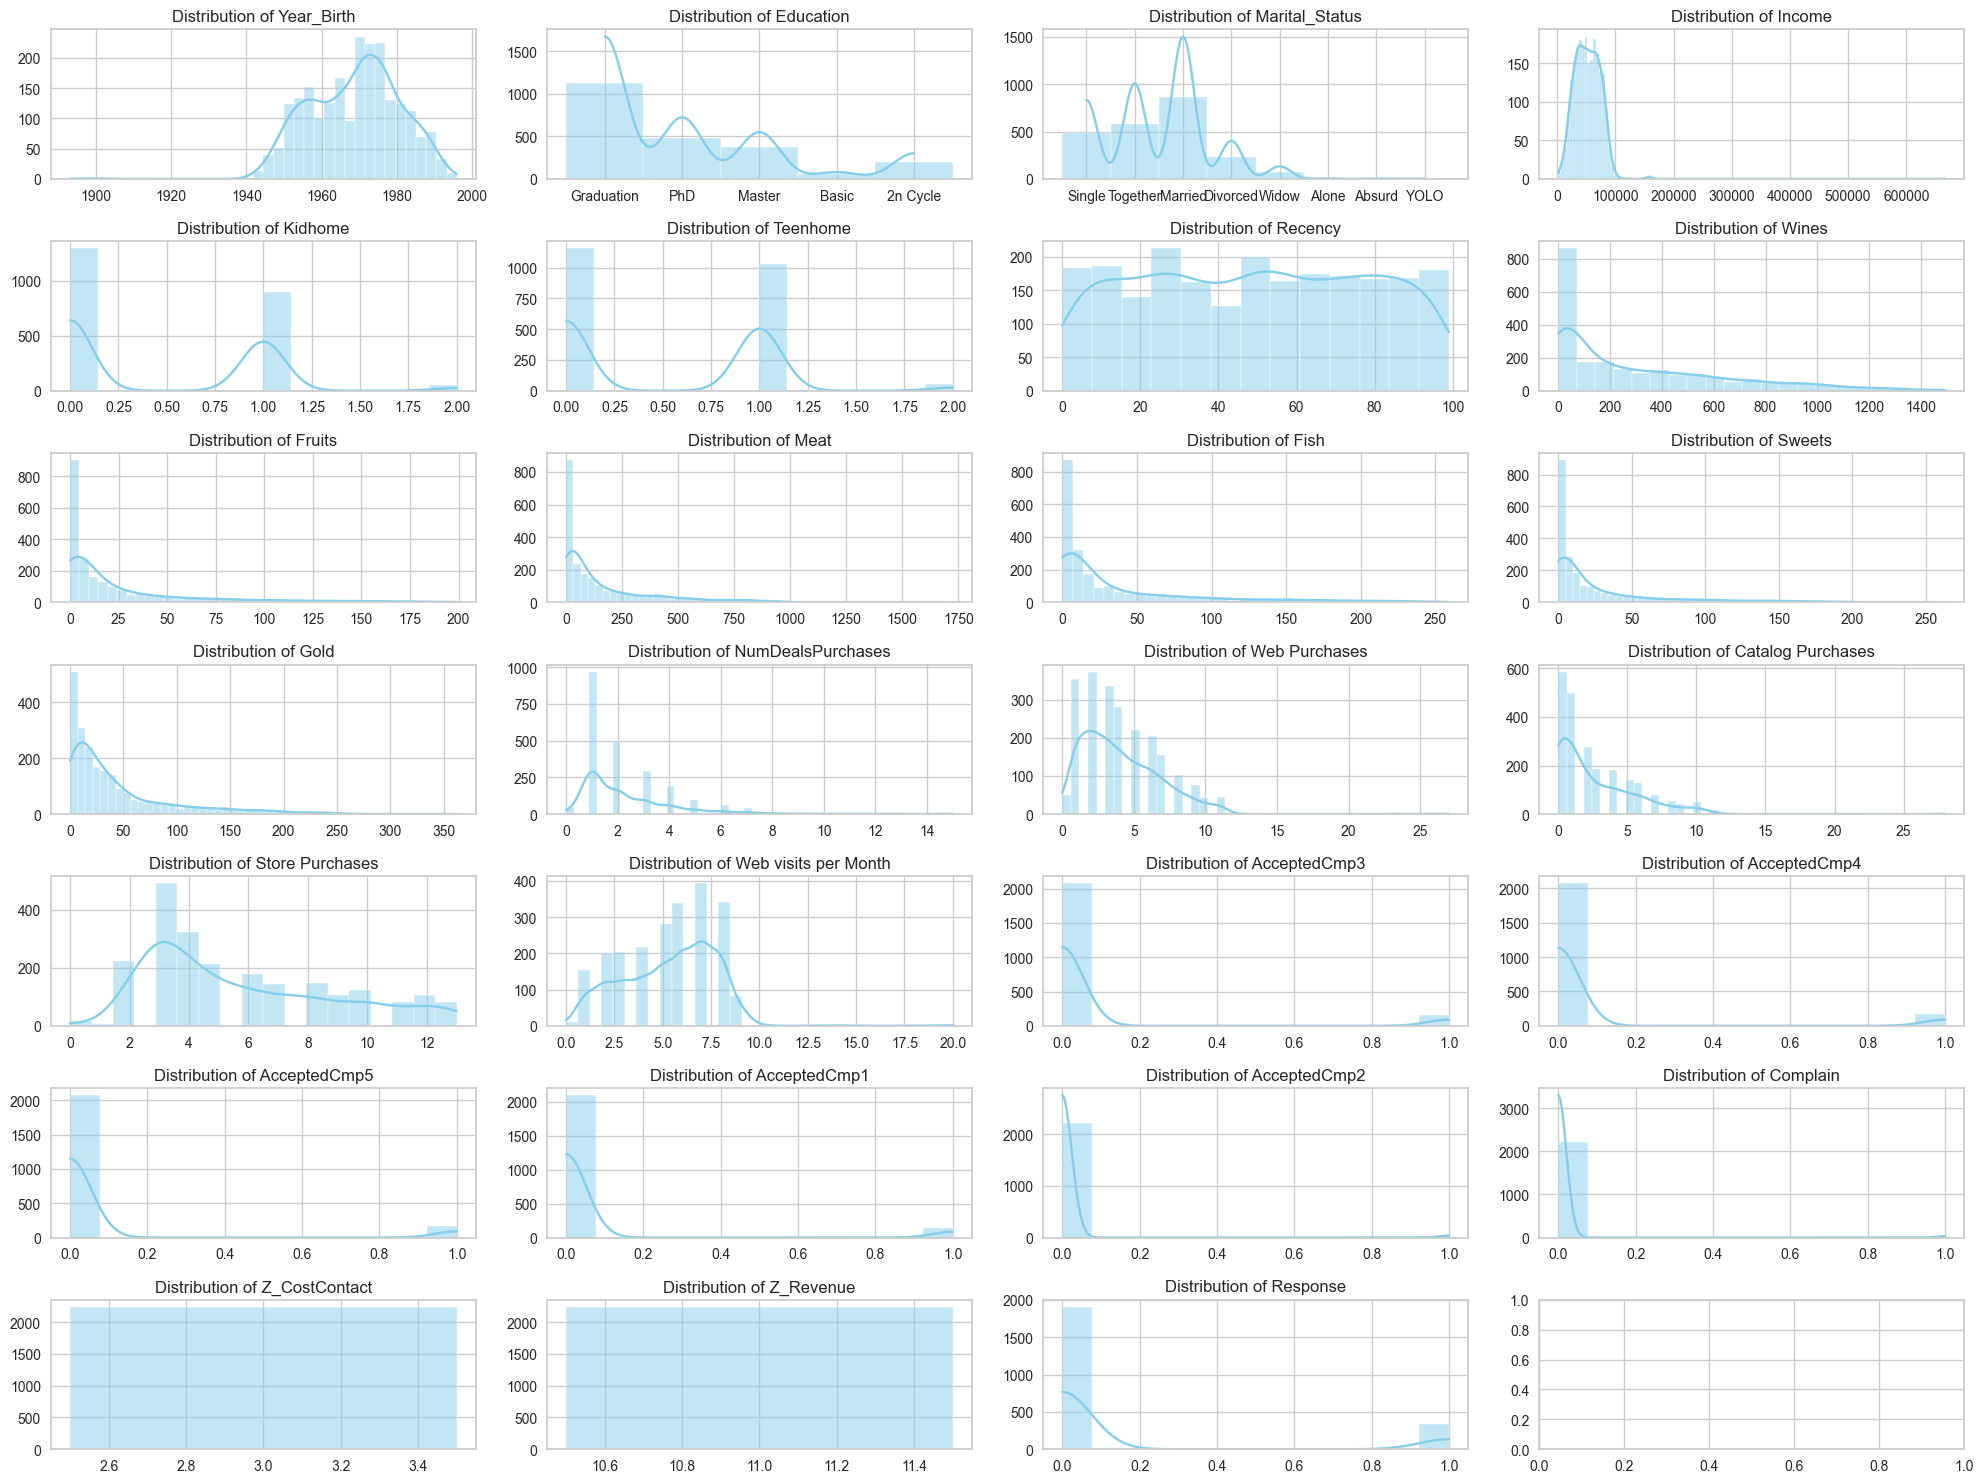

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Postavljanje stila za grafike
sns.set_style("whitegrid")
#column_dt_customer = data['Dt_Customer']

# Broj kolona i redova u subplotu
num_cols = 4  # Broj kolona
num_rows = (len(data.columns) - 2) // num_cols + 1  # Broj redova

# Kreiranje subplota
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iteriranje kroz sve kolone osim 'Dt_Customer'
for i, column in enumerate(data.columns[2:]):
    #if column != 'Dt_Customer':
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data[column], kde=True, ax=axes[row, col], color='skyblue')
        axes[row, col].set_title(f'Distribution of {column}', fontsize=12)
        axes[row, col].set_xlabel('')
        axes[row, col].set_ylabel('')

# Uklanjanje praznih subplotova
for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Podešavanje rasporeda
plt.tight_layout()
plt.show()



Kako su vrednosti atributa 'Z_CostContact' i 'Z_Revenue' za svaki podatak iste, izbacicemo ove atribute, jer ne donose nikakvu informaciju.

In [238]:
data = data.drop(columns=['Z_CostContact', 'Z_Revenue'])

C:\Users\User\AppData\Local\Temp\ipykernel_35428\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_35428\1049609643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


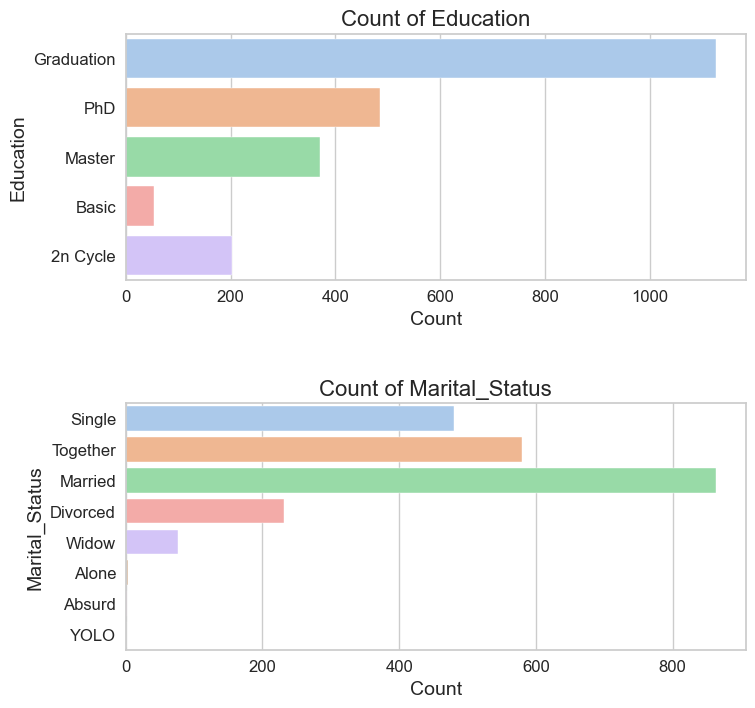

In [239]:
kategoricki_atributi = ['Education','Marital_Status']
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

In [240]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Master': 'Advanced',
    'PhD': 'Advanced',
    'Graduation': 'Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic':'Undergraduate'
}

# Zamena vrednosti u koloni 'Education' koristeći rečnik
data['Education'] = data['Education'].replace(mapping)

In [241]:
# Kreiranje rečnika koji mapira stare vrednosti u nove vrednosti
mapping = {
    'Single': 'Single',
    'Together': 'Couple',
    'Married': 'Couple',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

# Dodavanje novih kolona 'Slobodan' i 'Zauzet' na osnovu mapiranja
data['Marital_Status'] = data['Marital_Status'].replace(mapping)


C:\Users\User\AppData\Local\Temp\ipykernel_35428\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
C:\Users\User\AppData\Local\Temp\ipykernel_35428\1149114140.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")


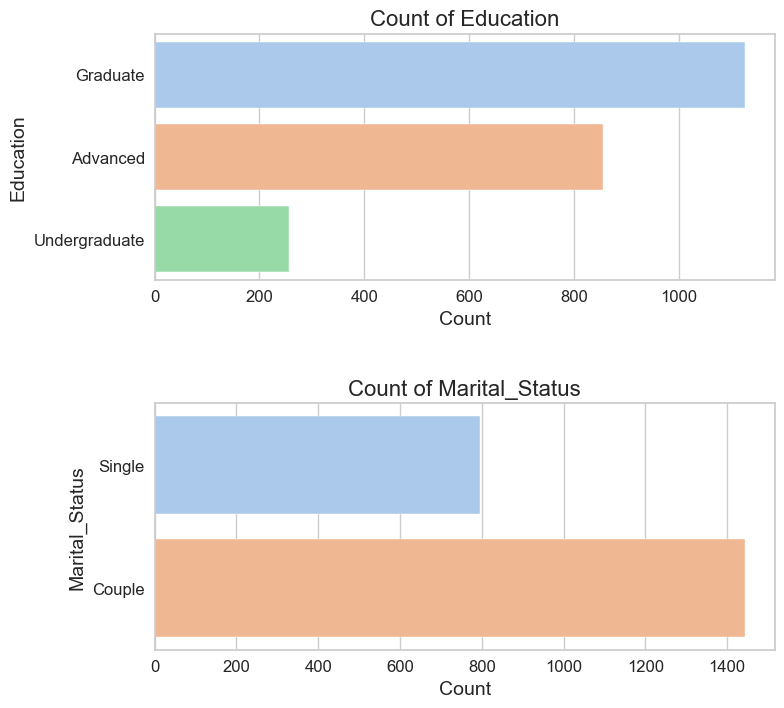

In [242]:
sns.set_style("whitegrid")

# Definisanje brojača za iteraciju kroz kategoricki_atributi
num_plots = len(kategoricki_atributi)

# Postavljanje dimenzija grafika
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4 * num_plots))

# Iteriranje kroz kategoricki_atributi i crtanje countplot-a za svaki atribut
for i, a in enumerate(kategoricki_atributi):
    sns.countplot(data=data, y=a, ax=axes[i], palette="pastel")
    axes[i].set_title(f'Count of {a}', fontsize=16)
    axes[i].set_ylabel(a, fontsize=14)
    axes[i].set_xlabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)

# Podešavanje razmaka između subplotova
plt.subplots_adjust(hspace=0.5)

# Prikazivanje grafika
plt.show()

corr_data = data.drop(columns=kategoricki_atributi)
corr_data = corr_data.drop(columns=['ID', 'Dt_Customer'])

In [243]:
LE = LabelEncoder()
data['Marital_Status'] = data[['Marital_Status']].apply(LE.fit_transform)

In [244]:
encoded_data = pd.get_dummies(data, columns=['Education'])
encoded_data

,ID,Dt_Customer,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Advanced,Education_Graduate,Education_Undergraduate
0,5524,2012-09-04,1957,1,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,False,True,False
1,2174,2014-03-08,1954,1,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,False,True,False
2,4141,2013-08-21,1965,0,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,False,True,False
3,6182,2014-02-10,1984,0,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,False,True,False
4,5324,2014-01-19,1981,0,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,1967,0,61223.0,0,1,46,709,43,...,0,0,0,0,0,0,0,False,True,False
2236,4001,2014-06-10,1946,0,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,True,False,False
2237,7270,2014-01-25,1981,1,56981.0,0,0,91,908,48,...,0,1,0,0,0,0,0,False,True,False
2238,8235,2014-01-24,1956,0,69245.0,0,1,8,428,30,...,0,0,0,0,0,0,0,True,False,False


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'Year_Birth'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Kidhome'),
  Text(3.5, 0, 'Teenhome'),
  Text(4.5, 0, 'Recency'),
  Text(5.5, 0, 'Wines'),
  Text(6.5, 0, 'Fruits'),
  Text(7.5, 0, 'Meat'),
  Text(8.5, 0, 'Fish'),
  Text(9.5, 0, 'Sweets'),
  Text(10.5, 0, 'Gold'),
  Text(11.5, 0, 'NumDealsPurchases'),
  Text(12.5, 0, 'Web Purchases'),
  Text(13.5, 0, 'Catalog Purchases'),
  Text(14.5, 0, 'Store Purchases'),
  Text(15.5, 0, 'Web visits per Month'),
  Text(16.5, 0, 'AcceptedCmp3'),
  Text(17.5, 0, 'AcceptedCmp4'),
  Text(18.5, 0, 'AcceptedCmp5'),
  Text(19.5, 0, 'AcceptedCmp1'),
  Text(20.5, 0, 'AcceptedCmp2'),
  Text(21.5, 0, 'Complain'),
  Text(22.5, 0, 'Response')])

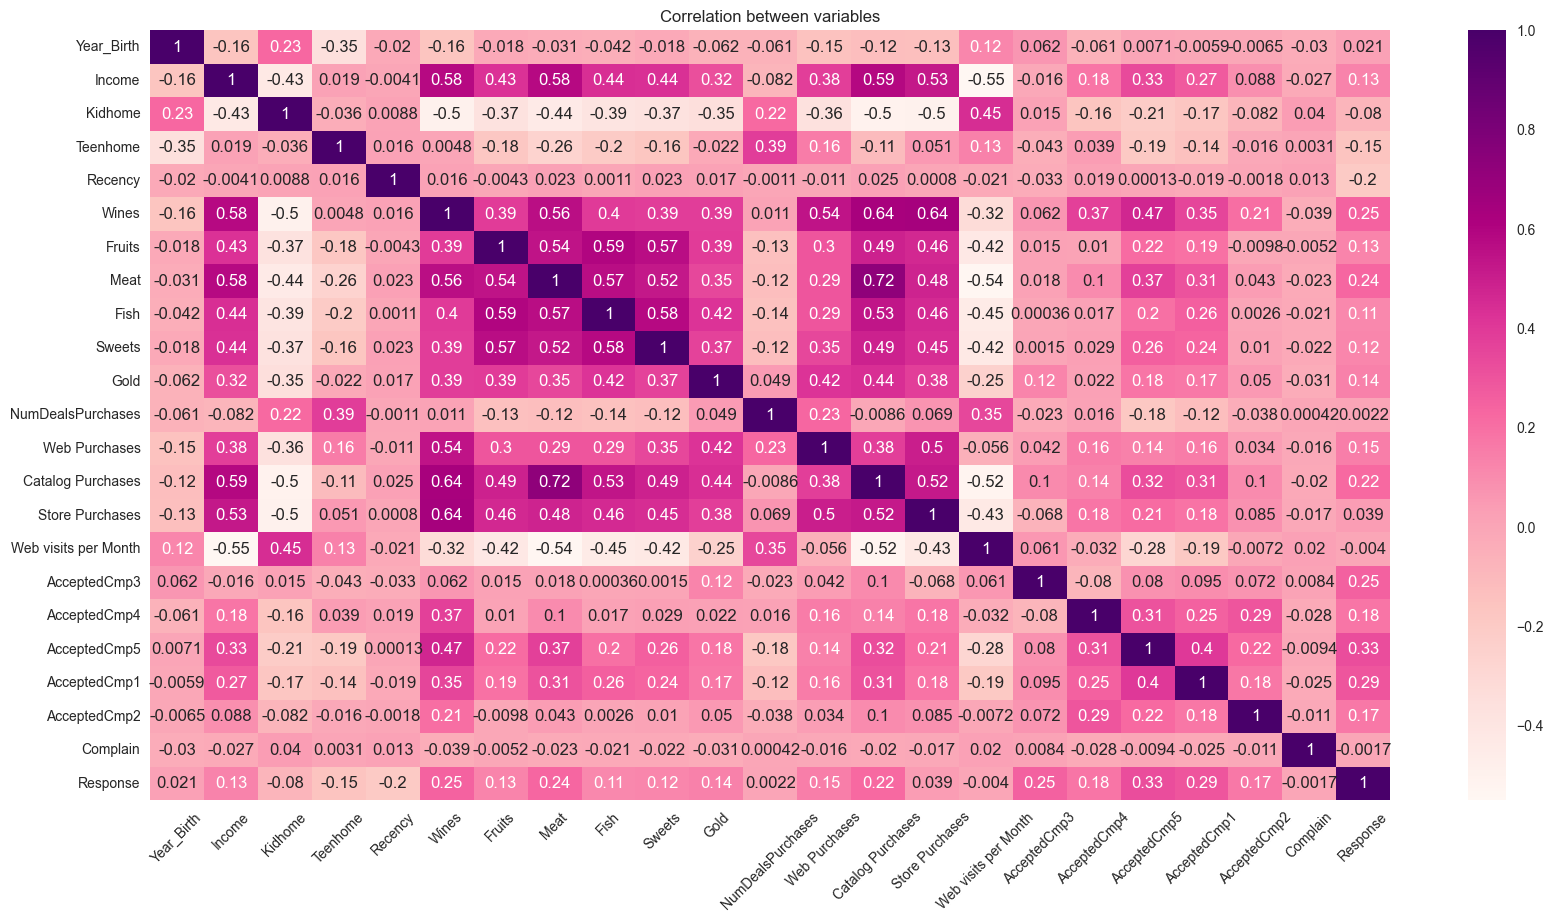

In [245]:
plt.subplots(figsize=(20,10))
correlation=corr_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=45)

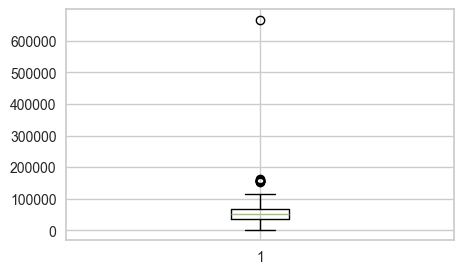

In [246]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(encoded_data["Income"])
plt.show()

In [247]:
original_count = encoded_data.shape[0]
encoded_data = encoded_data[encoded_data['Income'] <= 600000]
filtered_count = encoded_data.shape[0]
rows_deleted = original_count - filtered_count  # Broj izbrisanih redova

print(f'Broj izbrisanih redova: {rows_deleted}')

Broj izbrisanih redova: 1


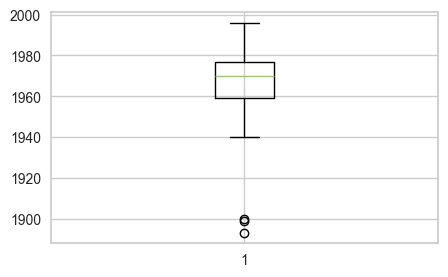

In [248]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(encoded_data["Year_Birth"])
plt.show()

In [249]:
original_count = encoded_data.shape[0]
encoded_data = encoded_data[encoded_data['Year_Birth'] >= 1920]
filtered_count = encoded_data.shape[0]
rows_deleted = original_count - filtered_count  # Broj izbrisanih redova

print(f'Broj izbrisanih redova: {rows_deleted}')

Broj izbrisanih redova: 3


In [250]:
# Spojite kolone "Kidhome" i "Teenhome" u novu kolonu "Children"
encoded_data['Children'] = encoded_data['Kidhome'] + encoded_data['Teenhome']

# Izbrišite originalne kolone "Kidhome" i "Teenhome" ako više nisu potrebne
encoded_data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Prikazivanje rezultata
print(encoded_data.head())

     ID Dt_Customer  Year_Birth  Marital_Status   Income  Recency  Wines  \
0  5524  2012-09-04        1957               1  58138.0       58    635   
1  2174  2014-03-08        1954               1  46344.0       38     11   
2  4141  2013-08-21        1965               0  71613.0       26    426   
3  6182  2014-02-10        1984               0  26646.0       26     11   
4  5324  2014-01-19        1981               0  58293.0       94    173   

   Fruits  Meat  Fish  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0      88   546   172  ...             0             0             0   
1       1     6     2  ...             0             0             0   
2      49   127   111  ...             0             0             0   
3       4    20    10  ...             0             0             0   
4      43   118    46  ...             0             0             0   

   AcceptedCmp2  Complain  Response  Education_Advanced  Education_Graduate  \
0             0         0      

In [251]:
#Broj godina u 2014 godini jer su podaci za 2014 godinu
encoded_data['Age'] = 2014 - encoded_data['Year_Birth']
encoded_data.drop(['Year_Birth'], axis=1, inplace=True)


# Prikazivanje rezultata
print(encoded_data.head())

     ID Dt_Customer  Marital_Status   Income  Recency  Wines  Fruits  Meat  \
0  5524  2012-09-04               1  58138.0       58    635      88   546   
1  2174  2014-03-08               1  46344.0       38     11       1     6   
2  4141  2013-08-21               0  71613.0       26    426      49   127   
3  6182  2014-02-10               0  26646.0       26     11       4    20   
4  5324  2014-01-19               0  58293.0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   172      88  ...             0             0             0         0   
1     2       1  ...             0             0             0         0   
2   111      21  ...             0             0             0         0   
3    10       3  ...             0             0             0         0   
4    46      27  ...             0             0             0         0   

   Response  Education_Advanced  Education_Graduate  Education_Undergradua

In [252]:
# Pronalaženje minimalne vrednosti u koloni 'Dt_Customer'
min_date = encoded_data['Dt_Customer'].min()

# Računanje broja dana u odnosu na minimalnu vrednost
encoded_data['Days_Since_First_Purchase'] = (encoded_data['Dt_Customer'] - min_date).dt.days

# Prikazivanje rezultata
print(data.head())

     ID Dt_Customer  Year_Birth Education  Marital_Status   Income  Kidhome  \
0  5524  2012-09-04        1957  Graduate               1  58138.0        0   
1  2174  2014-03-08        1954  Graduate               1  46344.0        1   
2  4141  2013-08-21        1965  Graduate               0  71613.0        0   
3  6182  2014-02-10        1984  Graduate               0  26646.0        1   
4  5324  2014-01-19        1981  Advanced               0  58293.0        1   

   Teenhome  Recency  Wines  ...  Catalog Purchases  Store Purchases  \
0         0       58    635  ...                 10                4   
1         1       38     11  ...                  1                2   
2         0       26    426  ...                  2               10   
3         0       26     11  ...                  0                4   
4         0       94    173  ...                  3                6   

   Web visits per Month  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7

In [253]:
encoded_data.dtypes

ID                                    int64
Dt_Customer                  datetime64[ns]
Marital_Status                        int32
Income                              float64
Recency                               int64
Wines                                 int64
Fruits                                int64
Meat                                  int64
Fish                                  int64
Sweets                                int64
Gold                                  int64
NumDealsPurchases                     int64
Web Purchases                         int64
Catalog Purchases                     int64
Store Purchases                       int64
Web visits per Month                  int64
AcceptedCmp3                          int64
AcceptedCmp4                          int64
AcceptedCmp5                          int64
AcceptedCmp1                          int64
AcceptedCmp2                          int64
Complain                              int64
Response                        

In [254]:
encoded_data = encoded_data.drop(columns = ['Dt_Customer', 'ID'], axis = 1)

In [255]:
encoded_data["TotalAcceptedCmp"] = encoded_data['AcceptedCmp3'] + encoded_data['AcceptedCmp4'] + encoded_data['AcceptedCmp5'] + encoded_data['AcceptedCmp1'] + encoded_data['AcceptedCmp2'] + encoded_data['Response']
del_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']
encoded_data = encoded_data.drop(del_col, axis=1)

In [260]:
encoded_data.dtypes

Marital_Status                 int32
Income                       float64
Recency                        int64
Wines                          int64
Fruits                         int64
Meat                           int64
Fish                           int64
Sweets                         int64
Gold                           int64
NumDealsPurchases              int64
Web Purchases                  int64
Catalog Purchases              int64
Store Purchases                int64
Web visits per Month           int64
Complain                       int64
Education_Advanced              bool
Education_Graduate              bool
Education_Undergraduate         bool
Children                       int64
Age                            int64
Days_Since_First_Purchase      int64
TotalAcceptedCmp               int64
dtype: object

In [257]:
duplicates = encoded_data.duplicated()
duplicates.sum()

185

In [258]:
encoded_data.drop_duplicates(inplace=True)
encoded_data.duplicated().sum()

0

In [261]:
encoded_data.head(n=10)

,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,Store Purchases,Web visits per Month,Complain,Education_Advanced,Education_Graduate,Education_Undergraduate,Children,Age,Days_Since_First_Purchase,TotalAcceptedCmp
0,1,58138.0,58,635,88,546,172,88,88,3,...,4,7,0,False,True,False,0,57,36,1
1,1,46344.0,38,11,1,6,2,1,6,2,...,2,5,0,False,True,False,2,60,586,0
2,0,71613.0,26,426,49,127,111,21,42,1,...,10,4,0,False,True,False,0,49,387,0
3,0,26646.0,26,11,4,20,10,3,5,2,...,4,6,0,False,True,False,1,30,560,0
4,0,58293.0,94,173,43,118,46,27,15,5,...,6,5,0,True,False,False,1,33,538,0
5,0,62513.0,16,520,42,98,0,42,14,2,...,10,6,0,True,False,False,1,47,406,0
6,1,55635.0,34,235,65,164,50,49,27,4,...,7,6,0,False,True,False,1,43,106,0
7,0,33454.0,32,76,10,56,3,1,23,2,...,4,8,0,True,False,False,1,29,282,0
8,0,30351.0,19,14,0,24,3,3,2,1,...,2,9,0,True,False,False,1,40,311,1
9,0,5648.0,68,28,0,6,1,1,13,1,...,0,20,0,True,False,False,2,64,591,1


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, 'Marital_Status'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Recency'),
  Text(3.5, 0, 'Wines'),
  Text(4.5, 0, 'Fruits'),
  Text(5.5, 0, 'Meat'),
  Text(6.5, 0, 'Fish'),
  Text(7.5, 0, 'Sweets'),
  Text(8.5, 0, 'Gold'),
  Text(9.5, 0, 'NumDealsPurchases'),
  Text(10.5, 0, 'Web Purchases'),
  Text(11.5, 0, 'Catalog Purchases'),
  Text(12.5, 0, 'Store Purchases'),
  Text(13.5, 0, 'Web visits per Month'),
  Text(14.5, 0, 'Complain'),
  Text(15.5, 0, 'Education_Advanced'),
  Text(16.5, 0, 'Education_Graduate'),
  Text(17.5, 0, 'Education_Undergraduate'),
  Text(18.5, 0, 'Children'),
  Text(19.5, 0, 'Age'),
  Text(20.5, 0, 'Days_Since_First_Purchase'),
  Text(21.5, 0, 'TotalAcceptedCmp')])

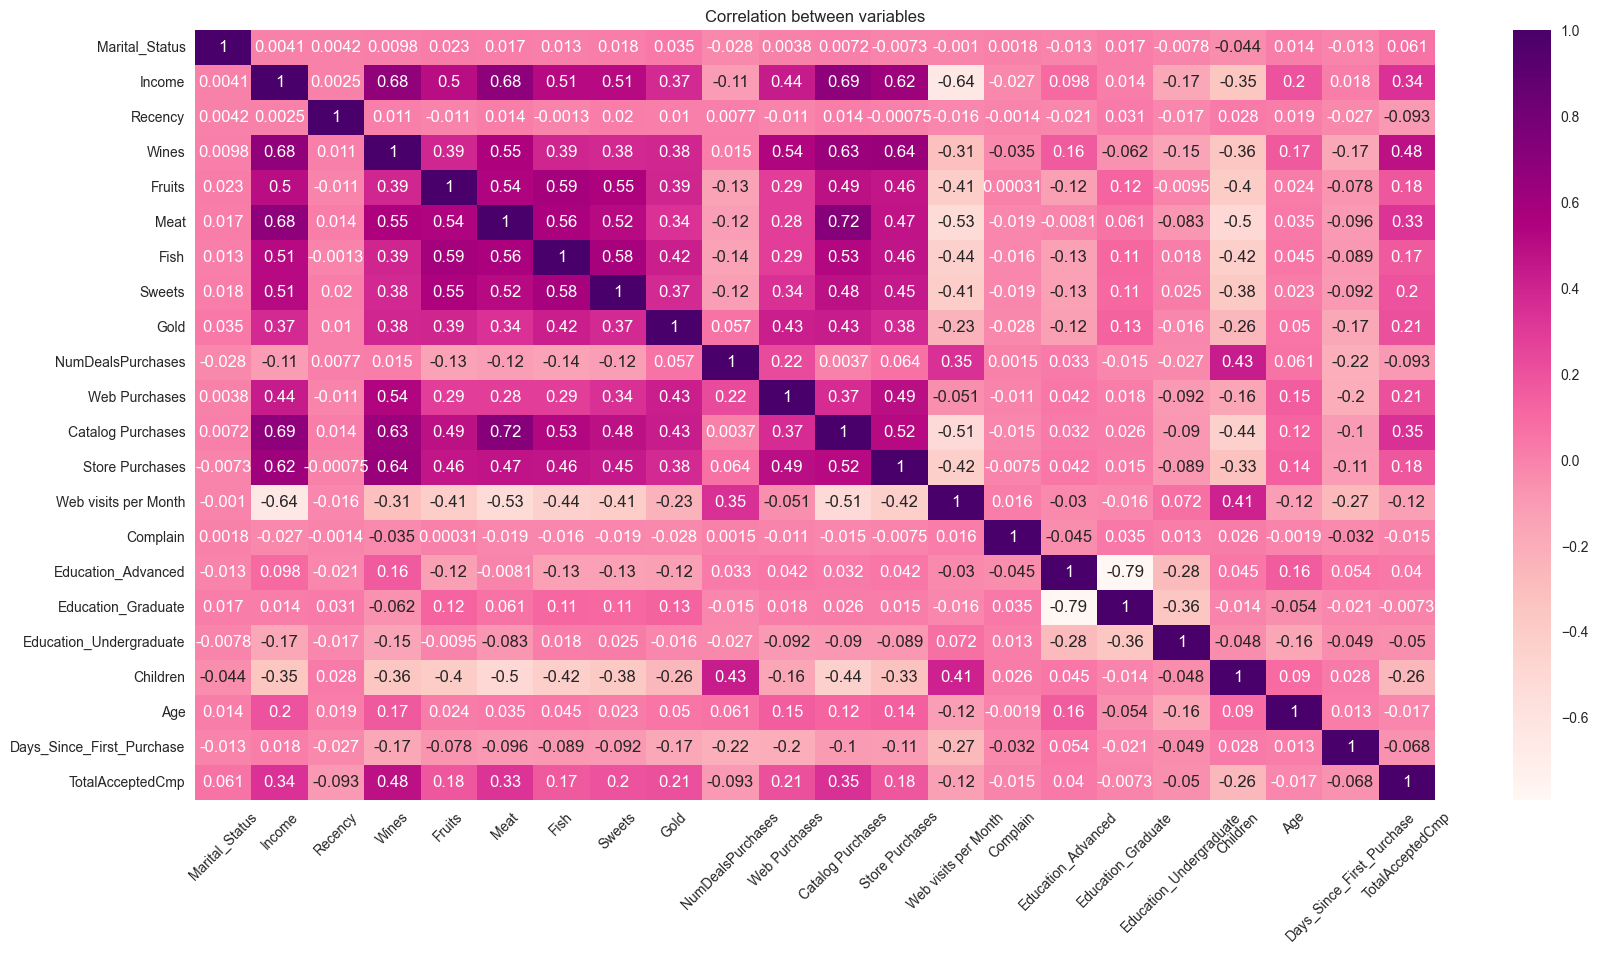

In [259]:
plt.subplots(figsize=(20,10))
correlation=encoded_data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=45)